<div style="text-align: center;">
<pre style="display: inline-block; text-align: left; color: #ff5555; font-family: monospace; margin: 0 auto;">
╔════════════════════════════════════╗
║    ██████╗ ███╗   ██╗ ███╗   ██╗   ║
║    ██╔══██╗████╗  ██║ ████╗  ██║   ║
║    ██████╔╝██╔██╗ ██║ ██╔██╗ ██║   ║
║    ██╔══██╗██║╚██╗██║ ██║╚██╗██║   ║
║    ██║  ██║██║ ╚████║ ██║ ╚████║   ║
║    ╚═╝  ╚═╝╚═╝  ╚═══╝ ╚═╝  ╚═══╝   ║
║         R E C U R R E N T          ║
║        N E U R A L  N E T          ║
╚════════════════════════════════════╝
</pre>
</div>

# 🔁 Recurrent Neural Networks (RNNs)
### "Machines that *remember*... sometimes."

---

## 🧐 What is an RNN?
A **Recurrent Neural Network (RNN)** is a type of neural network designed for **sequential data**, meaning it processes inputs **in order** and retains a memory of past computations. Unlike traditional neural networks, which treat each input independently, RNNs use loops to pass information from one step to the next.

Imagine you're reading a **sentence**:  
💡 *"The quick brown ___ jumps over the lazy dog."*  
Your brain remembers the previous words and predicts the missing word: **"fox"**.  
That’s how an RNN works—using past context to predict the future!

---

## ✏️ Simple Example:
Think of an RNN like a **chain of thoughts**.  

<div style="text-align: center;">
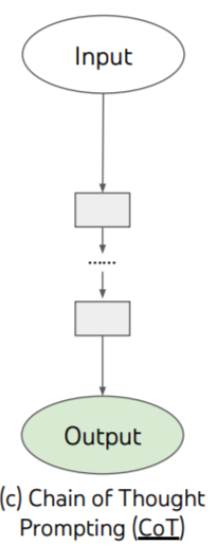
</div>


Let's say you want to predict the next letter in the word **"HELLO"**:

| Input  | H | E | L | L |
|--------|---|---|---|---|
| Output | E | L | L | O |


At each step, the RNN uses **past letters** to guess the **next letter**.

---

## 🔣 The Math Behind RNNs

A simple **vanilla RNN** updates its hidden state $h_t$ at time step $t$ using:

\[
$h_t$ = $\tanh$($W_{xh}$ $x_t$ + $W_{hh}$ $h_{t-1}$ + $b_h$)
\]

The output $y_t$ is:

\[
$y_t$ = $\text{softmax}$($W_{hy}$ $h_t$ + $b_y$)
\]

---

### 📚 Parameters:

- $x_t$ = Input at time $t$  
- $h_{t-1}$ = Previous hidden state  
- $W_{xh}$ = Input-to-hidden weights  
- $W_{hh}$ = Hidden-to-hidden weights  
- $W_{hy}$ = Hidden-to-output weights  
- $b_h$ = Hidden layer bias  
- $b_y$ = Output layer bias  
- $\tanh$ = Hyperbolic tangent activation  
- $\text{softmax}$ = Probability normalization  

<div style="background: #f8f9fa; padding: 15px; border-radius: 5px; margin-top: 10px;">
</div>

---

🚀 *Let’s build something simple with RNNs!*

### Simple diagram of RNNs working:
<div style="text-align: center;">
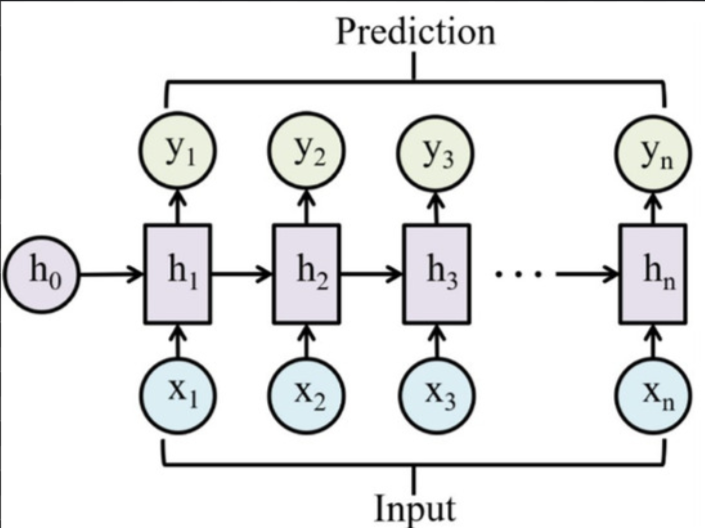
</div>

### Importing libraries:

In [42]:
import numpy as np
import matplotlib.pyplot as plt

### Activation functions:

In [47]:
# tanh activation for hidden state
def tanh(x): return np.tanh(x)

# softmax activation for output
def softmax(x):
    e_x = np.exp(x - np.max(x))  # prevent overflow
    return e_x / e_x.sum(axis=0)

### 🧠 Why `tanh`?
Because it squishes the values between -1 and 1 — like trying to calm a very excited neural net.

### 🤓 Why `softmax`?
It converts raw scores into probabilities — the neural net's way of saying:  
*"I’m 80% sure this sequence is about cats."*

#### Let's create a dummy input sequence:
#### 3 time steps, each input is a vector of size 4

##### 📦 Input:
We have 3 inputs, one at each time step.  
Each input is a 4-dimensional vector — you can imagine this as a one-hot encoded word, feature vector, etc.

In [59]:
inputs = [np.random.randn(4, 1) for _ in range(3)]
for i in inputs: print(i)

[[ 0.77423064]
 [-0.97606824]
 [ 0.70077239]
 [ 0.81373976]]
[[ 0.0450931 ]
 [-0.23762094]
 [ 0.32508921]
 [-1.28482277]]
[[ 0.6482759 ]
 [-0.72079913]
 [-0.71066943]
 [-1.37910686]]


#### Initializing Weights & States:
### 🏗️ Architecture:
- 4 input features → 5 hidden units → 2 output classes
- `Wx`, `Wh`, and `Wy` are our randomly initialized weights
- `h_prev` is initially all zeros — a neural net's version of "Hi, nice to meet you."

In [66]:
# Weight matrices and bias vectors
Wx = np.random.randn(5, 4)   # Input to hidden (5 hidden units, 4 input features)
Wh = np.random.randn(5, 5)   # Hidden to hidden
Wy = np.random.randn(2, 5)   # Hidden to output (2 output classes)
b = np.zeros((5, 1))         # Hidden bias
by = np.zeros((2, 1))        # Output bias

# Initial hidden state
h_prev = np.zeros((5, 1))
Wx, Wh, Wy, b, by

(array([[-1.01342094, -0.27297938,  2.22098019, -1.944329  ],
        [-0.67216779, -1.32495388, -0.37301888,  0.59382377],
        [ 0.15060816, -0.86412586,  0.06682506,  0.8648145 ],
        [ 0.62585462,  0.41211397, -0.27729158,  0.09716342],
        [-2.7194223 , -0.14518989, -1.67425023,  1.03676646]]),
 array([[-0.79169814, -0.13803138, -0.65068042,  0.01222919,  0.4370007 ],
        [ 2.3682111 ,  0.77961333, -0.67113991, -0.72725508, -0.32696803],
        [-0.62021489, -0.92901806,  0.80521397, -0.78644331,  0.82445511],
        [ 1.30147403,  2.14811426, -0.40647879, -1.70121205, -0.30282151],
        [ 1.05123069, -0.44188303, -1.31407148,  0.15164025,  0.94562713]]),
 array([[-0.37908453,  0.46384002,  1.11427516, -1.0379572 , -0.28030644],
        [-0.59052378,  0.15257398,  0.2224191 , -0.53211571,  0.88095046]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([[0.],
        [0.]]))

#### The RNN Time Step Loop
### 🌀 What’s Happening Here?

At each time step:
1. The input `x` is processed along with the previous hidden state `h_prev`
2. A new hidden state is calculated 🧠
3. An output is generated and passed through softmax 📊
4. The hidden state is updated for the next time step 🔁

Think of this like storytelling — the RNN remembers the plot (hidden state) as new words (inputs) arrive.

📌 Note: This is a *vanilla RNN* — the simplest form. No memory gates, no drama. Just pure flow.


In [74]:
# List to store outputs at each time step
outputs = []

for t, x in enumerate(inputs):
    # Compute hidden state
    h_current = tanh(np.dot(Wx, x) + np.dot(Wh, h_prev) + b)

    # Compute output
    y = softmax(np.dot(Wy, h_current) + by)

    outputs.append(y)
    
    # Update previous hidden state
    h_prev = h_current

    # Print at each time step for clarity
    print(f"⏱️ Time step {t}")
    print("Input x:", x.ravel())
    print("Hidden state h:", h_current.ravel())
    print("Output y (probabilities):", y.ravel())
    print("-" * 80)

⏱️ Time step 0
Input x: [ 0.77423064 -0.97606824  0.70077239  0.81373976]
Hidden state h: [-0.24398643  0.98744086 -0.53559862  0.96088792 -0.87510891]
Output y (probabilities): [0.57646071 0.42353929]
--------------------------------------------------------------------------------
⏱️ Time step 1
Input x: [ 0.0450931  -0.23762094  0.32508921 -1.28482277]
Hidden state h: [ 0.99713814 -0.43081889 -0.99835692  0.35131533 -0.98977134]
Output y (probabilities): [0.53942129 0.46057871]
--------------------------------------------------------------------------------
⏱️ Time step 2
Input x: [ 0.6482759  -0.72079913 -0.71066943 -1.37910686]
Hidden state h: [ 0.13345182  0.99151454 -0.98974645  0.57295655 -0.22643771]
Output y (probabilities): [0.36060426 0.63939574]
--------------------------------------------------------------------------------


#### Plot the Hidden States Over Time:
### 🖼️ What Are We Seeing?
- This plot shows how each hidden unit's value **changes over time** as it processes the sequence.
- Hidden states capture past information — kinda like how your playlist remembers your music vibe over time. 🎵


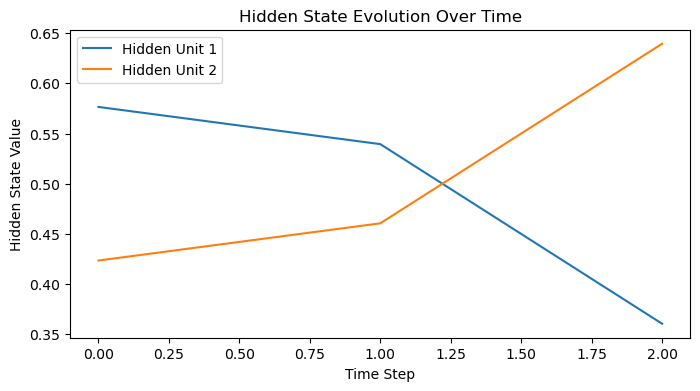

In [79]:
# Convert outputs & hidden states to arrays for visualization
hidden_states = np.array([h_prev.ravel() for h_prev in outputs])

# Plot hidden states
plt.figure(figsize=(8, 4))
for i in range(hidden_states.shape[1]):  # Loop through each hidden unit
    plt.plot(hidden_states[:, i], label=f'Hidden Unit {i+1}')

plt.xlabel('Time Step')
plt.ylabel('Hidden State Value')
plt.title('Hidden State Evolution Over Time')
plt.legend()
plt.show()

1. **Defined activation functions** (`tanh` for hidden state, `softmax` for output).
2. **Created a simple input sequence** (3 time steps, 4D vectors).
3. **Initialized weights and hidden states** (randomly).
4. **Implemented the RNN loop** (computed hidden states + outputs).
5. **Visualized hidden states over time** (so we can *see* learning in action).

🚀 **What’s Next?**
- This was a **basic** RNN. Want to upgrade?
- Next is **LSTMs** or **GRUs** (they handle long-term dependencies better).